<a href="https://www.kaggle.com/code/itsnahm/my-first-stroke-prediction?scriptVersionId=117796511" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/playground-series-s3e2/train.csv")

# Dataset Identification

In [3]:
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [4]:
df_train.shape

(15304, 12)

There are 15.304 rows and 12 columns in dataset.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [6]:
df_train.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

There are no missing values in dataset

In [7]:
df_train.duplicated().sum()

0

There is no duplicated data in dataset

In [8]:
df_train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,15304.0,NaN,NaN,NaN,7651.5,4418.028595,0.0,3825.75,7651.5,11477.25,15303.0
gender,15304,3,Female,9446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,15304.0,NaN,NaN,NaN,41.417708,21.444673,0.08,26.0,43.0,57.0,82.0
hypertension,15304.0,NaN,NaN,NaN,0.049726,0.217384,0.0,0.0,0.0,0.0,1.0
heart_disease,15304.0,NaN,NaN,NaN,0.023327,0.150946,0.0,0.0,0.0,0.0,1.0
ever_married,15304,2,Yes,10385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,15304,5,Private,9752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,15304,2,Rural,7664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,15304.0,NaN,NaN,NaN,89.039853,25.476102,55.22,74.9,85.12,96.98,267.6
bmi,15304.0,NaN,NaN,NaN,28.112721,6.722315,10.3,23.5,27.6,32.0,80.1


In [9]:
df_train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

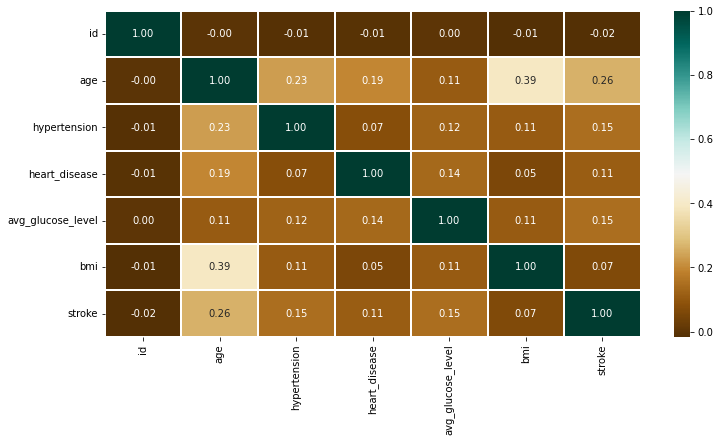

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True);

age has the highest correlation score with whether positive stroke or not. 

# Exploratory Data Analysis

In [12]:
numeric_columns = df_train.select_dtypes(exclude="object").columns.tolist()
numeric_columns

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [13]:
categoric_columns = df_train.select_dtypes(include="object").columns.tolist()
categoric_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

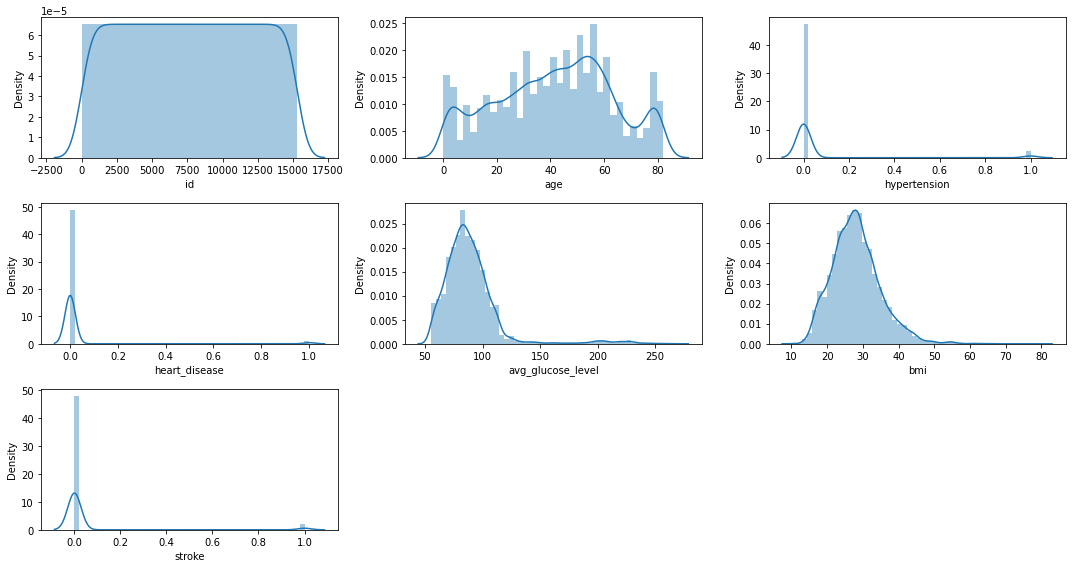

In [14]:
plt.figure(figsize = (15, 8));
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.distplot(df_train[i])
    number += 1
    plt.tight_layout();

Age has normal distribution. avg_glucose_level and bmi has positive skew distribution

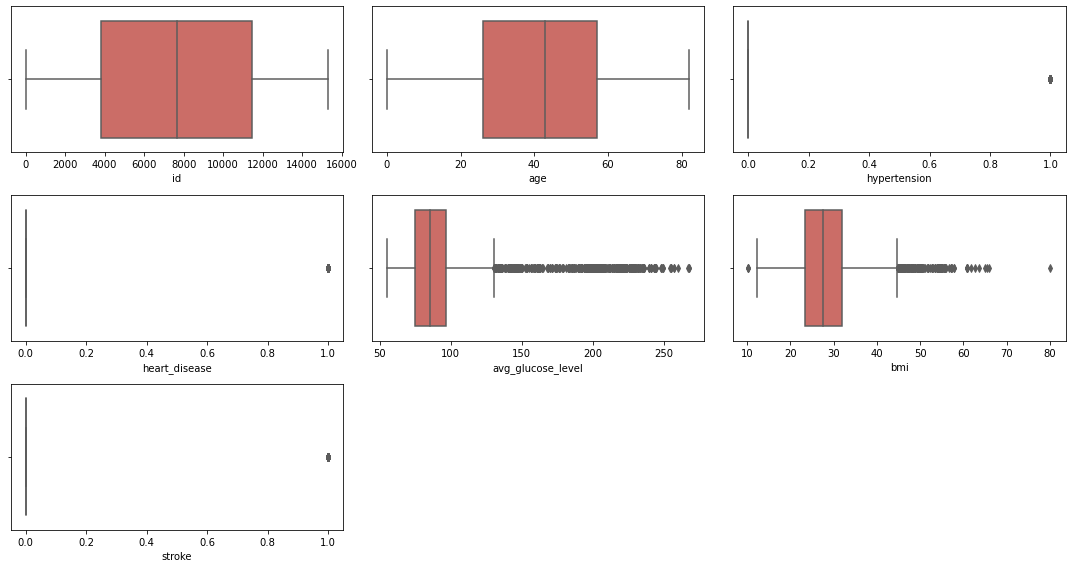

In [15]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.boxplot(x=i, data=df_train, palette="hls")
    number += 1
    plt.tight_layout()

avg_glucose_level and bmi have outliers

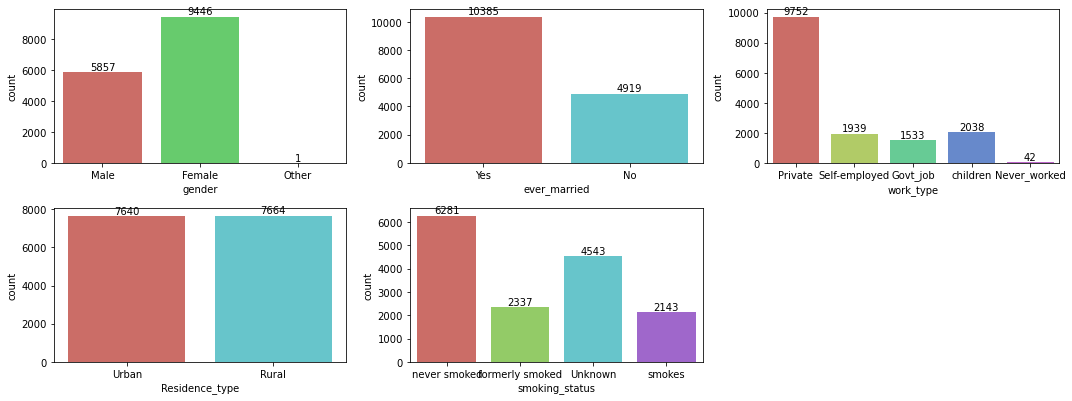

In [16]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 3, number)
    ax = sns.countplot(x=i, data=df_train, palette="hls")
    ax.bar_label(ax.containers[0]);
    number += 1
    plt.tight_layout()

In [17]:
df_train.gender.value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [18]:
df_train[df_train.gender == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9363,9363,Other,9.0,0,0,No,children,Rural,96.04,18.0,Unknown,0


Only 1 row data of people with gender 'Other'. What is it mean? I dunno how to handle this row hahaha. Maybe I'll remove it!

In [19]:
#delete specific row based on its index
df_train = df_train.drop(9363)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


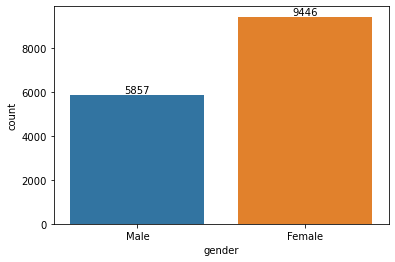

In [20]:
ax = sns.countplot(df_train.gender);
ax.bar_label(ax.containers[0]);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


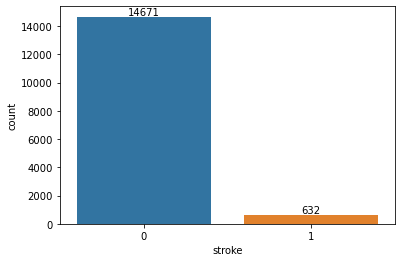

In [21]:
ax = sns.countplot(df_train.stroke);
ax.bar_label(ax.containers[0]);

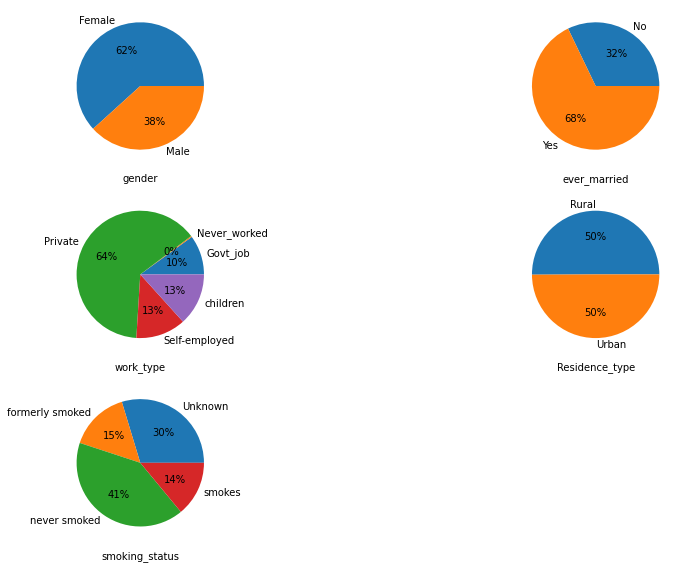

In [22]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in categoric_columns:
    plt.subplot(row, 2, number)
    df_train.groupby(i).size().plot(kind='pie', autopct='%.0f%%')
    plt.xlabel(i)
    plt.ylabel("")
    number += 1
    plt.tight_layout()

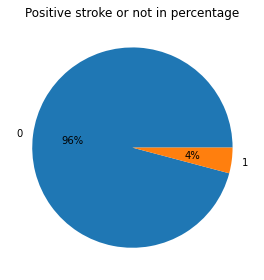

In [23]:
df_train.groupby('stroke').size().plot(kind='pie', autopct='%.0f%%')
plt.title("Positive stroke or not in percentage")
plt.ylabel("")
plt.tight_layout()

96% of people in data aren't positive stroke. Only 4% of people in data who positive stroke which is 632 people from total 15.303 peope. 

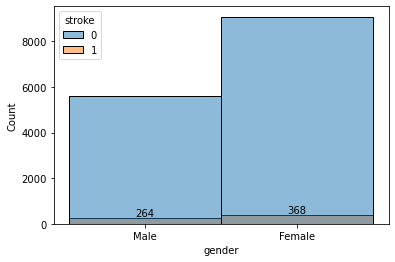

In [24]:
ax = sns.histplot(data=df_train, x="gender", hue="stroke");
ax.bar_label(ax.containers[0]);

Based on countplot diagram, female has many positive stroke people than male.

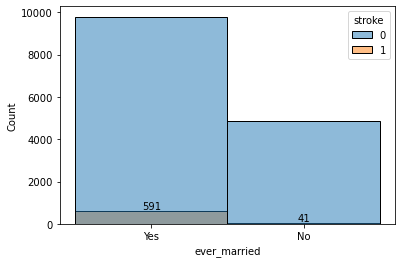

In [25]:
ax = sns.histplot(data=df_train, x="ever_married", hue="stroke");
ax.bar_label(ax.containers[0]);

There are many people who positive stroke are ever married before.

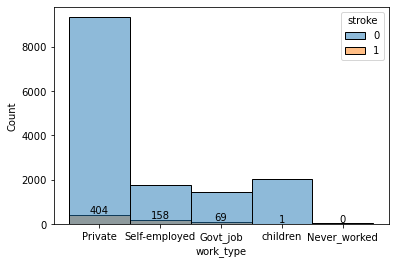

In [26]:
ax = sns.histplot(data=df_train, x="work_type", hue="stroke");
ax.bar_label(ax.containers[0]);

There are many people who positive stroke has private type job

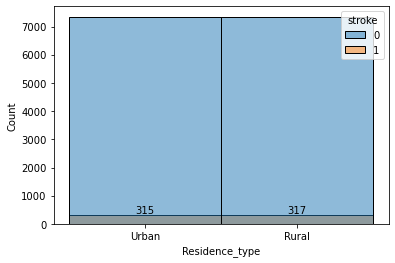

In [27]:
ax = sns.histplot(data=df_train, x="Residence_type", hue="stroke");
ax.bar_label(ax.containers[0]);

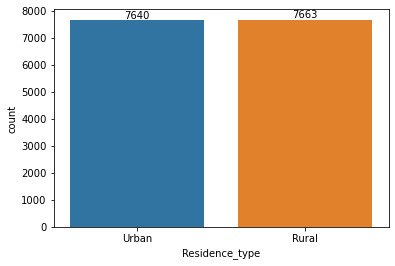

In [28]:
ax = sns.countplot(data=df_train, x="Residence_type");
ax.bar_label(ax.containers[0]);

Resident type of people whether positive stroke or not is almost same.

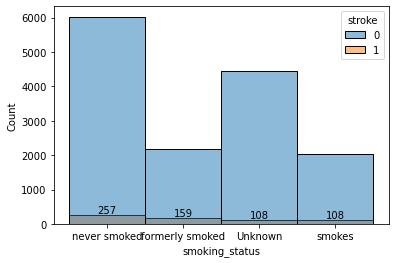

In [29]:
ax = sns.histplot(data=df_train, x="smoking_status", hue="stroke");
ax.bar_label(ax.containers[0]);

Amount of positive stroke people who is either smoker or 'Unknown' is same! But the highest amount of positive stroke people is come from people who never smoked!

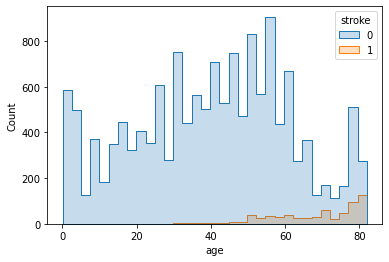

In [30]:
sns.histplot(df_train, x="age", hue="stroke", element="step");

People who positive stroke has range age between above 20 to above 80 years old. Based on diagram, we know if the older age, the more people has stroke. High amount stroke people come from around 80 years old.

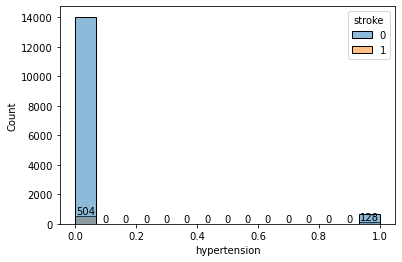

In [31]:
ax = sns.histplot(data=df_train, x="hypertension", hue="stroke");
ax.bar_label(ax.containers[0]);

Many people who stroke has hypertension.

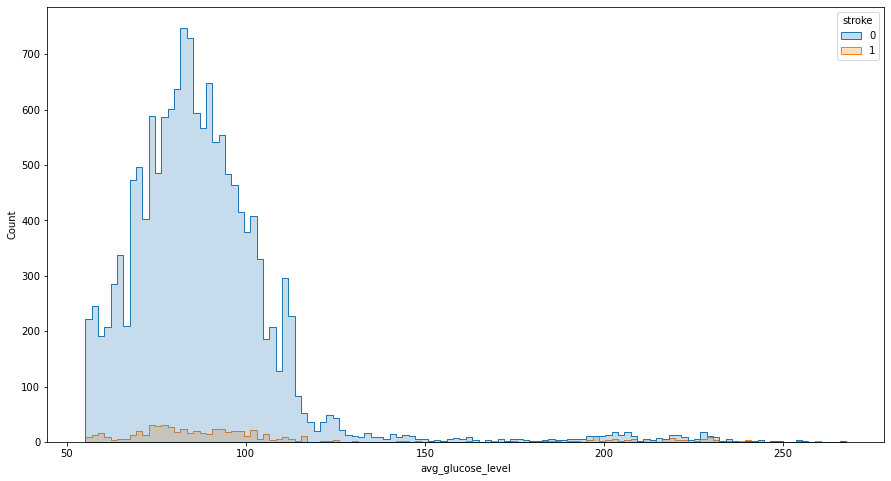

In [32]:
plt.figure(figsize = (15, 8))
sns.histplot(data=df_train, x="avg_glucose_level", hue="stroke", element="step");
plt.show();

Many people who positive stroke has average glucose level monstly around 100. People who positive stroke consists of people who has avg glucose level above 50 until above 250. In other hand, people who stroke has variative average glucose level. 

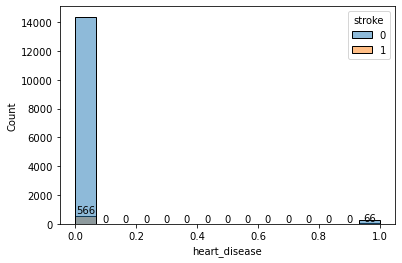

In [33]:
ax = sns.histplot(data=df_train, x="heart_disease", hue="stroke");
ax.bar_label(ax.containers[0]);

Many people who stroke has heart disease. 

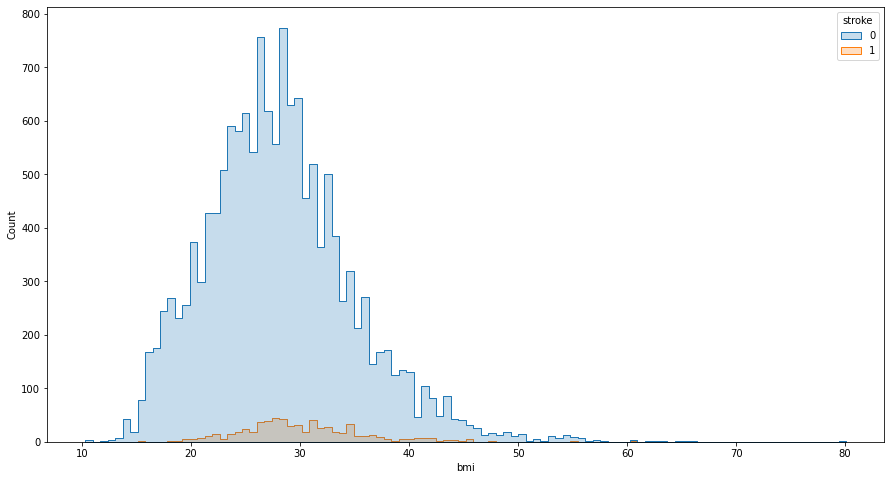

In [34]:
plt.figure(figsize = (15, 8))
sns.histplot(data=df_train, x="bmi", hue="stroke", element="step");
plt.show();

People who stroke has BMI around under 20 to above 60. 

# Feature Engineering and Data Preprocessing

In [35]:
df_train.nunique()

id                   15303
gender                   2
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

Since id has too much unique columns as much as data rows, I'll delete it.

In [36]:
del df_train['id']

In [37]:
df_train[categoric_columns]

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,never smoked
1,Male,Yes,Private,Rural,formerly smoked
2,Female,Yes,Private,Rural,Unknown
3,Male,Yes,Private,Urban,never smoked
4,Female,No,Private,Rural,never smoked
...,...,...,...,...,...
15299,Female,No,Govt_job,Urban,never smoked
15300,Female,Yes,Private,Urban,never smoked
15301,Female,Yes,Self-employed,Urban,never smoked
15302,Male,Yes,Private,Rural,Unknown


In [38]:
df_train.work_type.value_counts()

Private          9752
children         2037
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

In [39]:
df_train.gender=df_train.gender.map({'Female':0, 'Male':1})
df_train.ever_married=df_train.ever_married.map({'No':0, 'Yes':1})
df_train.Residence_type = df_train.Residence_type.map({'Rural':0, 'Urban':1})

In [40]:
df_train[categoric_columns]

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,Private,1,never smoked
1,1,1,Private,0,formerly smoked
2,0,1,Private,0,Unknown
3,1,1,Private,1,never smoked
4,0,0,Private,0,never smoked
...,...,...,...,...,...
15299,0,0,Govt_job,1,never smoked
15300,0,1,Private,1,never smoked
15301,0,1,Self-employed,1,never smoked
15302,1,1,Private,0,Unknown


In [41]:
from scipy import stats

In [42]:
print(f'Rows amount before filtering outliers: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in ['avg_glucose_level','bmi']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Rows amount after filtering outliers: {len(df_train)}')

Rows amount before filtering outliers: 15303
Rows amount after filtering outliers: 14541


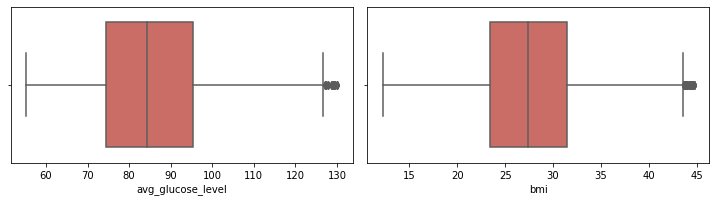

In [43]:
plt.figure(figsize = (15, 8))
number = 1
row = 3
for i in ['avg_glucose_level','bmi']:
    plt.subplot(row, 3, number)
    sns.boxplot(x=i, data=df_train, palette="hls")
    number += 1
    plt.tight_layout()

Finally, avg_glucose_level and bmi don't have outliers.

Now we need to normalization numeric data.

In [44]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [45]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,28.0,0,0,1,Private,1,79.53,31.1,never smoked,0
1,1,33.0,0,0,1,Private,0,78.44,23.9,formerly smoked,0
2,0,42.0,0,0,1,Private,0,103.00,40.3,Unknown,0
3,1,56.0,0,0,1,Private,1,64.87,28.8,never smoked,0
4,0,24.0,0,0,0,Private,0,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,0,22.0,0,0,0,Govt_job,1,72.63,19.5,never smoked,0
15300,0,46.0,1,0,1,Private,1,101.19,32.1,never smoked,0
15301,0,75.0,0,0,1,Self-employed,1,87.69,26.2,never smoked,0
15302,1,46.0,0,0,1,Private,0,101.13,22.5,Unknown,0


In [46]:
df_train[['age','avg_glucose_level','bmi']] = minmax.fit_transform(df_train[['age','avg_glucose_level','bmi']])

In [47]:
df_train[['age','avg_glucose_level','bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,14541.0,0.497364,0.261310,0.0,0.304199,0.511719,0.682617,1.0
avg_glucose_level,14541.0,0.400511,0.197725,0.0,0.255578,0.389846,0.536406,1.0
bmi,14541.0,0.475061,0.187845,0.0,0.344615,0.467692,0.593846,1.0


Last of data preprocessing on this notebook is one hot encode for categoric data.

In [48]:
df_train_final = pd.get_dummies(df_train)

In [49]:
df_train_final

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.340820,0,0,1,1,0.324783,0.581538,0,0,0,1,0,0,0,0,1,0
1,1,0.401855,0,0,1,0,0.310220,0.360000,0,0,0,1,0,0,0,1,0,0
2,0,0.511719,0,0,1,0,0.638343,0.864615,0,0,0,1,0,0,1,0,0,0
3,1,0.682617,0,0,1,1,0.128925,0.510769,0,0,0,1,0,0,0,0,1,0
4,0,0.291992,0,0,0,0,0.242351,0.510769,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,0,0.267578,0,0,0,1,0.232599,0.224615,0,1,0,0,0,0,0,0,1,0
15300,0,0.560547,1,0,1,1,0.614162,0.612308,0,0,0,1,0,0,0,0,1,0
15301,0,0.914551,0,0,1,1,0.433801,0.430769,0,0,0,0,1,0,0,0,1,0
15302,1,0.560547,0,0,1,0,0.613360,0.316923,0,0,0,1,0,0,1,0,0,0


In [50]:
df_train.shape

(14541, 11)

In [51]:
df_train_final.shape

(14541, 18)

# Modelling

In [52]:
from sklearn.model_selection import train_test_split

X = df_train_final.drop(['stroke'], axis = 1)
y = df_train_final["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Because ratio of people who positive and negative stroke is 96:4, we need to oversampling to positive stroke data to prevent overfitting when implement model

In [53]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of positive stroke '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of negative stroke '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of positive stroke '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of negative stroke '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of positive stroke '1': 357
Before OverSampling, counts of negative stroke '0': 9821 

After OverSampling, the shape of X_train: (19642, 17)
After OverSampling, the shape of y_train: (19642,) 

After OverSampling, counts of positive stroke '1': 9821
After OverSampling, counts of negative stroke '0': 9821


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR = LR.fit(X_train_res, y_train_res.ravel())

y_predict = LR.predict(X_test)
print('Accurate score: ', accuracy_score(y_test, y_predict))

Accurate score:  0.7971579188631676


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [56]:
print('\nClassification report:')
cr = classification_report(y_test, y_predict);
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      4205
           1       0.13      0.79      0.22       158

    accuracy                           0.80      4363
   macro avg       0.56      0.79      0.55      4363
weighted avg       0.96      0.80      0.86      4363




Confusion matrix:


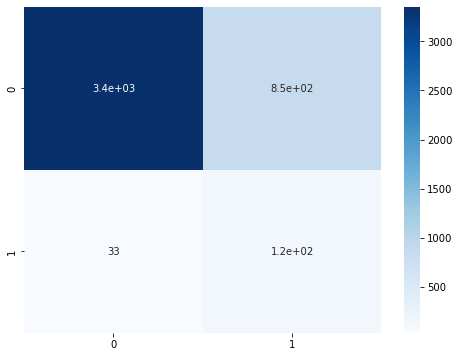

In [57]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [58]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
print(cm)


Confusion matrix:
[[3353  852]
 [  33  125]]


# XG Boost

In [59]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb = xgb.fit(X_train_res, y_train_res.ravel())

y_predict = xgb.predict(X_test)
print('Accurate score: ', accuracy_score(y_test, y_predict))

Accurate score:  0.9463671785468715


In [60]:
print('\nClassification report:')
cr = classification_report(y_test, y_predict);
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4205
           1       0.21      0.18      0.19       158

    accuracy                           0.95      4363
   macro avg       0.59      0.58      0.58      4363
weighted avg       0.94      0.95      0.94      4363




Confusion matrix:


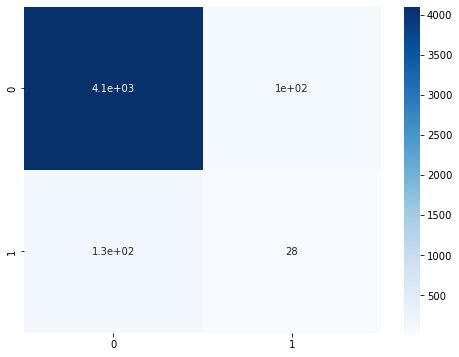

In [61]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [62]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
print(cm)


Confusion matrix:
[[4101  104]
 [ 130   28]]


# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_train_res, y_train_res.ravel())

y_predict = dt.predict(X_test)
print('Accurate score: ', accuracy_score(y_test, y_predict))

Accurate score:  0.9156543662617465


In [64]:
print('\nClassification report:')
cr = classification_report(y_test, y_predict);
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      4205
           1       0.14      0.25      0.18       158

    accuracy                           0.92      4363
   macro avg       0.55      0.60      0.57      4363
weighted avg       0.94      0.92      0.93      4363




Confusion matrix:


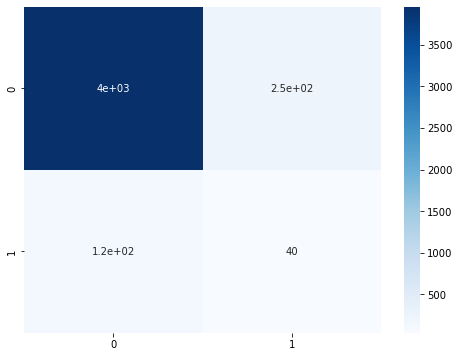

In [65]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [66]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
print(cm)


Confusion matrix:
[[3955  250]
 [ 118   40]]


# Support Vector Machine**

In [67]:
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', random_state = 0)
classifier.fit(X_train_res, y_train_res.ravel())

y_predict = classifier.predict(X_test)
print('Accurate score: ', accuracy_score(y_test, y_predict))

Accurate score:  0.7978455191382077


In [68]:
print('\nClassification report:')
cr = classification_report(y_test, y_predict);
print(cr)


Classification report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      4205
           1       0.12      0.71      0.20       158

    accuracy                           0.80      4363
   macro avg       0.55      0.76      0.54      4363
weighted avg       0.96      0.80      0.86      4363




Confusion matrix:


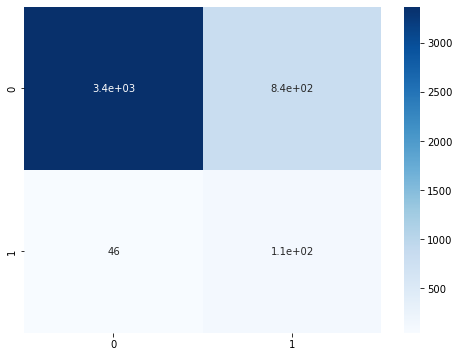

In [69]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.show()

In [70]:
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_predict)
print(cm)


Confusion matrix:
[[3369  836]
 [  46  112]]


# Conclusion
Since it's stroke detection, we must prioritize FN score. FN means model predict negative stroke but positive stroke in actual. Stroke disease must be detect as earlier as possible to prevent more damage. 

XGBoost has the lowest FN score which is only 91 people who actually positive stroke but prediction result is negative. It is dangerous for people who doesn't detect stroke disease. 

XGBoost has accurate score 0.95++

# Processing Dataset Train

In [71]:
df_test = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")

In [72]:
df_test_final = df_test.drop("id", axis=1)

In [73]:
df_test_final.gender=df_test_final.gender.map({'Female':0, 'Male':1})
df_test_final.ever_married=df_test_final.ever_married.map({'No':0, 'Yes':1})
df_test_final.Residence_type = df_test_final.Residence_type.map({'Rural':0, 'Urban':1})

In [74]:
df_test_final[categoric_columns]

,gender,ever_married,work_type,Residence_type,smoking_status
0,0.0,1,Private,0,Unknown
1,1.0,1,Private,1,Unknown
2,0.0,0,children,1,Unknown
3,0.0,1,Govt_job,1,smokes
4,1.0,1,Private,0,smokes
...,...,...,...,...,...
10199,0.0,0,Private,1,never smoked
10200,1.0,1,Private,1,Unknown
10201,0.0,0,children,0,Unknown
10202,1.0,1,Private,1,never smoked


In [75]:
df_test_final[['age','avg_glucose_level','bmi']] = minmax.fit_transform(df_test_final[['age','avg_glucose_level','bmi']])

In [76]:
df_test_final[['age','avg_glucose_level','bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,10204.0,0.510751,0.257543,0.0,0.316406,0.530029,0.694824,1.0
avg_glucose_level,10204.0,0.160381,0.121961,0.0,0.093844,0.140954,0.195924,1.0
bmi,10204.0,0.194452,0.078210,0.0,0.141696,0.188153,0.238095,1.0


In [77]:
#One hot encoding
df_test_final = pd.get_dummies(df_test_final)

In [78]:
df_test.shape

(10204, 11)

In [79]:
df_test_final.shape

(10204, 17)

In [80]:
X_test.shape

(4363, 17)

Columns amount of df_test_final and X_test are same!

In [81]:
prediction_result = xgb.predict(df_test_final)

In [82]:
prediction_result

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
new_dataframe = pd.DataFrame({'id': df_test.id, 'stroke': prediction_result})

In [84]:
new_dataframe

,id,stroke
0,15304,0
1,15305,0
2,15306,0
3,15307,0
4,15308,0
...,...,...
10199,25503,0
10200,25504,0
10201,25505,0
10202,25506,0


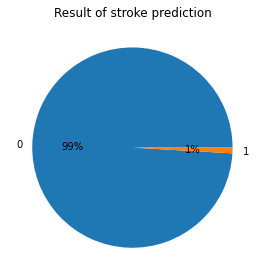

In [85]:
new_dataframe.groupby('stroke').size().plot(kind='pie', autopct='%.0f%%')
plt.title("Result of stroke prediction")
plt.ylabel("")
plt.tight_layout()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


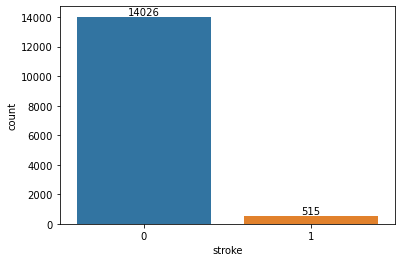

In [86]:
ax = sns.countplot(df_train.stroke);
ax.bar_label(ax.containers[0]);

# Conclusion after implement XGBoost
After implement machine learning with dataset test, people who is positive stroke in dataset train is only 508 people which is only 2% of people in dataset. 

In [87]:
new_dataframe.to_csv("submission.csv")